# dimensionaltiy reduction reasons
1. Space efficiency - makes data small
2. Computing efficiency It fastens the time required for performing same computations. Less dimensions leads to less computing, also less dimensions can allow usage of algorithms unfit for a large number of dimensions like linear regression
3. Visualizations!

PCA and T-SNE most popular.
#feature selection: you select a subset of the original feature set; while (NO NEED)
#feature extraction: you build a new set of features from the original feature set.

# Import Module

In [2]:
import numpy as np
np.random.seed(1) # random seed for consistency, debugging same results every time

# We'll first create 2 classes each with 3 features

Draw random samples from a multivariate normal distribution also called Gaussian distribution
uses mean to define center ,covariance for width, or standard deviation. how wide. how spread.
btw Covariance is a measure of how changes in one variable are associated with changes in a second variable. 

# create class 1 random sampled 3 X 20 data set

In [30]:
mu_vec1 = np.array([0,0,0])  # sample mean
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]]) # sample covariance

# Transpose = convenience, for printing
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
print (class1_sample)
# 3 x 20 matrix 

[[-0.55749472  0.35249436  0.51507361  0.32427424  0.85328122  0.56438286
  -1.75592564  0.0353601   0.61798553 -0.17545897 -1.42655542  0.47761018
  -1.87316098  2.11060505  0.36723181  0.08646441  0.45161595  2.05635552
  -2.413503    1.11584111]
 [ 0.93916874 -0.23643695 -2.78253447  0.02186284 -0.41302931  2.13782807
   0.7147896  -1.53879325 -0.18417633 -0.93391466  1.76795995 -1.02188594
   0.92061512 -1.30653407  1.23289919 -2.14246673  1.10417433  1.76024923
  -1.77756638  0.31027229]
 [-1.94332341  0.7278135   0.58464661 -0.46867382  1.83471763 -0.785534
   0.85270406 -0.44789518 -0.11598519 -0.53302033 -0.47537288  0.79452824
  -0.03536792  0.07638048 -0.42285696 -0.83016886 -0.28173627 -0.06065249
  -0.77785883 -2.09424782]]


# create class 2 random sampled 3 x 20 data set

In [31]:
mu_vec2 = np.array([1,1,1]) # sample mean
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]]) #sample covariance
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
print (class2_sample)

[[  7.71234171e-01   2.50030383e-01   5.20842901e-01   5.70857722e-01
    1.84086156e+00   9.50297421e-01   1.80884436e+00  -6.84059986e-01
    6.68716830e-01   2.00088142e+00   4.67765979e-01   2.77608095e-01
    1.77532811e-01   4.06156933e-01   2.04499441e+00   8.91607933e-01
    1.87096980e+00   8.81228828e-01   5.81062102e-01  -4.02329145e-01]
 [  2.61336137e+00   3.05462410e+00   1.35016716e+00   2.20845633e+00
    8.97112782e-01   1.46664327e+00   2.78975468e+00  -1.60170105e-01
    1.38653915e+00   6.15167751e-01   2.11813340e+00   2.09899633e+00
    1.72171129e+00   6.56099291e-01   1.60851470e+00   1.45015551e+00
    4.91542866e-01   8.01001816e-01   5.20815085e-01   1.45112294e+00]
 [  6.25195313e-01   1.05340954e+00   1.01716473e+00   2.11570180e+00
    2.14690038e+00   2.03368687e+00   1.45128402e+00   2.35010682e+00
    1.48544343e-01   2.45810824e+00   1.67439610e+00   9.83655095e-02
    3.74657999e-01  -1.69189873e-04   9.30671303e-01   2.76533510e+00
    1.77741921e+00

# plot samples

Populating the interactive namespace from numpy and matplotlib


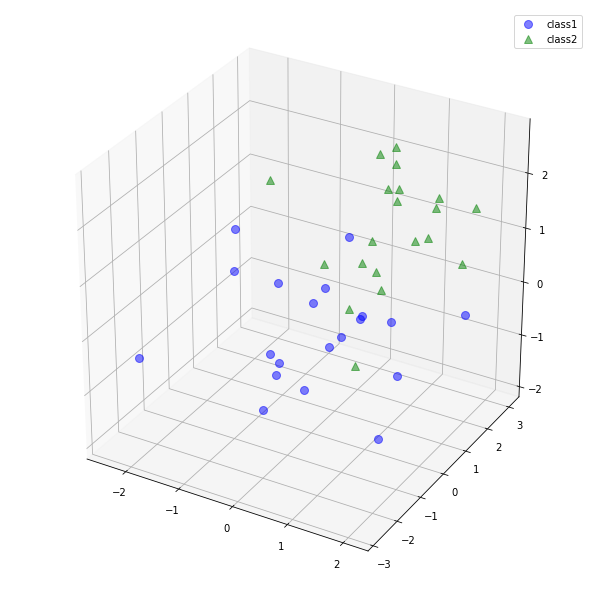

In [34]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D # new matplotlib

#figure, width and height
fig = plt.figure(figsize=(8,8))
#3d subplot

ax = Axes3D(fig) # new matplotlib
#fontsize
plt.rcParams['legend.fontsize'] = 10

#plot samples
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
        'o', markersize=8, color='blue', alpha=0.5, label='class1')

ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:],
        '^', markersize=8, alpha=0.5, color='green', label='class2')

ax.legend(loc='upper right')

plt.show()

# step 1. take the whole data set ignoring classes

In [36]:
#make it one big dataset
#3 x 40 still 3 features
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)

In [37]:
all_samples

array([[ -5.57494722e-01,   3.52494364e-01,   5.15073614e-01,
          3.24274243e-01,   8.53281222e-01,   5.64382855e-01,
         -1.75592564e+00,   3.53600971e-02,   6.17985534e-01,
         -1.75458969e-01,  -1.42655542e+00,   4.77610182e-01,
         -1.87316098e+00,   2.11060505e+00,   3.67231814e-01,
          8.64644065e-02,   4.51615951e-01,   2.05635552e+00,
         -2.41350300e+00,   1.11584111e+00,   7.71234171e-01,
          2.50030383e-01,   5.20842901e-01,   5.70857722e-01,
          1.84086156e+00,   9.50297421e-01,   1.80884436e+00,
         -6.84059986e-01,   6.68716830e-01,   2.00088142e+00,
          4.67765979e-01,   2.77608095e-01,   1.77532811e-01,
          4.06156933e-01,   2.04499441e+00,   8.91607933e-01,
          1.87096980e+00,   8.81228828e-01,   5.81062102e-01,
         -4.02329145e-01],
       [  9.39168744e-01,  -2.36436952e-01,  -2.78253447e+00,
          2.18628366e-02,  -4.13029310e-01,   2.13782807e+00,
          7.14789597e-01,  -1.53879325e+00,

In [38]:
all_samples.T

array([[ -5.57494722e-01,   9.39168744e-01,  -1.94332341e+00],
       [  3.52494364e-01,  -2.36436952e-01,   7.27813500e-01],
       [  5.15073614e-01,  -2.78253447e+00,   5.84646610e-01],
       [  3.24274243e-01,   2.18628366e-02,  -4.68673816e-01],
       [  8.53281222e-01,  -4.13029310e-01,   1.83471763e+00],
       [  5.64382855e-01,   2.13782807e+00,  -7.85533997e-01],
       [ -1.75592564e+00,   7.14789597e-01,   8.52704062e-01],
       [  3.53600971e-02,  -1.53879325e+00,  -4.47895185e-01],
       [  6.17985534e-01,  -1.84176326e-01,  -1.15985185e-01],
       [ -1.75458969e-01,  -9.33914656e-01,  -5.33020326e-01],
       [ -1.42655542e+00,   1.76795995e+00,  -4.75372875e-01],
       [  4.77610182e-01,  -1.02188594e+00,   7.94528240e-01],
       [ -1.87316098e+00,   9.20615118e-01,  -3.53679249e-02],
       [  2.11060505e+00,  -1.30653407e+00,   7.63804802e-02],
       [  3.67231814e-01,   1.23289919e+00,  -4.22856961e-01],
       [  8.64644065e-02,  -2.14246673e+00,  -8.3016886

# step 2. compute the d dimensional mean vector, to help compute covariance matrix

In [39]:
#mean for each feature
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

#3D mean vector
mean_vector = np.array([[mean_x],[mean_y],[mean_z]])
print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.44053954]
 [ 0.69280577]
 [ 0.520958  ]]


# step 3. compute the covariance matrix

In [40]:
#covariane matrix models relationship between our variables. the variance between each
#http://support.minitab.com/en-us/minitab/17/topic-library/modeling-statistics/anova/anova-statistics/what-is-the-variance-covariance-matrix/
#http://stats.seandolinar.com/making-a-covariance-matrix-in-r/
#Variance is the degree by which a random vairable changes with respect to its expected value
#Covariance is the degree by which two different random variables change with respect to each other. 
#measures relationship between each feature
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.11386337  0.25789568  0.43874144]
 [ 0.25789568  1.91228835  0.39270487]
 [ 0.43874144  0.39270487  1.52099965]]


note covariance and scatter matricies are idenical except for a scaling factor 1/N

# Step 4. computer eigenvectors and eigenvalues

Eigenvalues/vectors are instrumental to understanding electrical circuits, mechanical systems, ecology and even Google's PageRank algorithm. 

Eigenvectors make understanding linear transformations easy.
They are the "axes" (directions) along which a linear transformation acts simply by "stretching/compressing" and/or "flipping"; 

eigenvalues give you the factors by which this compression occurs.

There are a lot of problems that can be modeled with linear transformations, and 
the eigenvectors give very simply solution

The more directions you have along which you understand the behavior of a 
linear transformation, the easier it is to understand the linear transformation; 

so you want to have as many linearly independent eigenvectors as possible associated to a single linear transformation.

interactive tool - http://setosa.io/ev/eigenvectors-and-eigenvalues/

In [53]:
# eigenvectors and eigenvalues for the from the scatter matrix

# eigenvector = direction
# eigenvalues = magnitude of that direction

eig_val_sc, eig_vec_sc = np.linalg.eig(cov_mat)
eig_val_sc

array([ 2.32976264,  0.83372108,  1.38366764])

In [54]:
eig_vec_sc

array([[-0.35998542, -0.8447123 ,  0.39607024],
       [-0.74750856,  0.00712289, -0.66421398],
       [-0.55824855,  0.53517324,  0.63399381]])

In [55]:
for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))

Eigenvector 1: 
[[-0.35998542]
 [-0.74750856]
 [-0.55824855]]
Eigenvalue 1 from scatter matrix: 2.3297626418062913
Eigenvector 2: 
[[-0.8447123 ]
 [ 0.00712289]
 [ 0.53517324]]
Eigenvalue 2 from scatter matrix: 0.8337210811746119
Eigenvector 3: 
[[ 0.39607024]
 [-0.66421398]
 [ 0.63399381]]
Eigenvalue 3 from scatter matrix: 1.3836676446437721


# step 5. sort eigenvector by decreasing value

In [60]:
# Make a list of (eigenvalue, eigenvector) tuples
# magnitude > positive value
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i])
             for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs

[(2.3297626418062913, array([-0.35998542, -0.74750856, -0.55824855])),
 (1.3836676446437721, array([ 0.39607024, -0.66421398,  0.63399381])),
 (0.83372108117461186, array([-0.8447123 ,  0.00712289,  0.53517324]))]

# step 5.2 choose k eigenvectos w largest eigenvalues to form d x k matrix

In [63]:
#k is 2 
# hstack = merge?
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),
                      eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.35998542  0.39607024]
 [-0.74750856 -0.66421398]
 [-0.55824855  0.63399381]]


# step 6. use d x k to transform samples to new subspace

In [64]:
#dot product between orignal matrix and eigen pairs
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

In [65]:
transformed 

array([[ 0.58351077, -0.35645502,  1.56817123,  0.12855982, -1.02265431,
        -1.36269117, -0.37822453,  1.38756885, -0.02004384,  1.0588297 ,
        -0.54264983,  0.14839155,  0.00588704,  0.17421907, -0.81774151,
         2.03382687, -0.83067606, -2.0222002 ,  2.63181054,  0.5354931 ,
        -2.58015744, -2.96142932, -1.7645881 , -3.03742794, -2.53178683,
        -2.57372437, -3.54670031, -0.94596359, -1.36010286, -2.55236667,
        -2.68644099, -1.723865  , -1.56005544, -0.63655596, -2.45809259,
        -2.94871384, -2.03319605, -2.51618874, -0.06697622, -1.11020416],
       [-2.07667109,  0.75808651,  2.42286596, -0.18322253,  1.77549876,
        -1.69446373, -0.62963403,  0.75213029,  0.29356428,  0.21289351,
        -2.04070332,  1.3716441 , -1.37581179,  1.75219079, -0.94154799,
         0.93098041, -0.73315544, -0.39317423, -0.26838995, -1.0918759 ,
        -1.0339983 , -1.26203931, -0.04563339,  0.10055404,  1.49435718,
         0.69156445, -0.21645956,  1.32540461, -0.

In [66]:
# 2 dimensional data instead of 3 dimensional

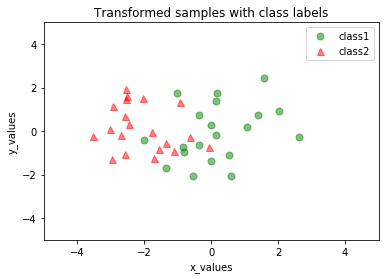

In [68]:
plt.plot(transformed[0,0:20], transformed[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

# Comparison

T-SNE gives better visualizations

PCA is betteron every other mark, efifiecny accuracy

PCA is label agnostic -- it treats the entire data set as a whole. 
LDA, on the other hand, tries to explicitly model difference between classes 
(labels) within the data. 
PCA performs unsupervised transformation, while LDA is supervised. 


Best visualizations
T-SNE

Best generic dim r method 
PCA 

Best for supervised
LDA


# T-SNE:

Step 1 - Compute similarity matrix between all feature vectors

Step 2 - Compute similarity matrix from map points

Step 3 - Use gradient descent to minimimze distance between matrices


# LDA (Linear Discriminant Analysis)

Similar to LDA except Compute the  M mean vectors for the different classes from the dataset

instead of #Take the whole dataset consisting of dd-dimensional samples ignoring the class labels

Compute the dd-dimensional mean vector (i.e., the means for every dimension of the whole dataset).